In [1]:
import os

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt


import cv2
from sklearn.utils import shuffle
from keras.utils import np_utils

In [2]:
def load_samples(csv_file):
    data = pd.read_csv(os.path.join('data',csv_file))
    data = data[['img_file','cat_id','cat_name']]
    file_names = list(data.iloc[:,0])
    # Get the labels present in the second column
    labels = list(data.iloc[:,1])
    label_names = list(data.iloc[:,2])
    samples=[]
    for samp,lab in zip(file_names,labels):
        samples.append([samp,lab])
    return samples

In [3]:
data = pd.read_csv(os.path.join('data','meta_df.csv'))
data = data[['img_file', 'cat_name','cat_id']]
data

,img_file,cat_name,cat_id
0,batch_1/000047.jpg,Other plastic bottle,4
1,batch_1/000048.jpg,Other plastic bottle,4
2,batch_1/000056.jpg,Other plastic bottle,4
3,batch_1/000058.jpg,Other plastic bottle,4
4,batch_1/000058.jpg,Other plastic bottle,4
...,...,...,...
116,batch_9/000080.jpg,Aluminium foil,0
117,batch_9/000084.jpg,Aluminium foil,0
118,batch_9/000087.jpg,Aluminium foil,0
119,batch_9/000089.jpg,Other plastic bottle,4


In [4]:
data_path = 'meta_df.csv'
samples = load_samples(data_path)
#print(samples[0])
samples = shuffle(samples,random_state=32)
#print(samples[0])
print('total no of images: ',len(samples))

train_sample = samples
test_sample = samples[int((len(samples) - len(samples)*.25)): ]

print('total no of train images: ',len(train_sample))
print('total no of test images: ',len(test_sample))

total no of images:  121
total no of train images:  121
total no of test images:  31


In [5]:
train_sample[0:2]

[['batch_11/000034.jpg', 4], ['batch_1/000106.JPG', 4]]

In [6]:
root_dir = r'C:\Users\Abhishek\Desktop\Mega drive\DL projects\Garbage classification\data\data'

In [7]:
def generator(samples, batch_size=32,shuffle_data=True,resize=300):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates


        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(os.path.join(root_dir,img_name))
                #print(type(label))
                # apply any kind of preprocessing
                img = cv2.resize(img,(resize,resize))
                #img,label = preprocessing(img,label)
                # Add example to arrays
                X_train.append(img)
                y_train.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [8]:
# this will create a generator object
datagen = generator(samples,batch_size=8)

x,y = next(datagen)

In [9]:
print ('x_shape: ', x.shape)
print ('labels: ', y)

x_shape:  (8, 300, 300, 3)
labels:  [4 4 4 0 0 0 0 4]


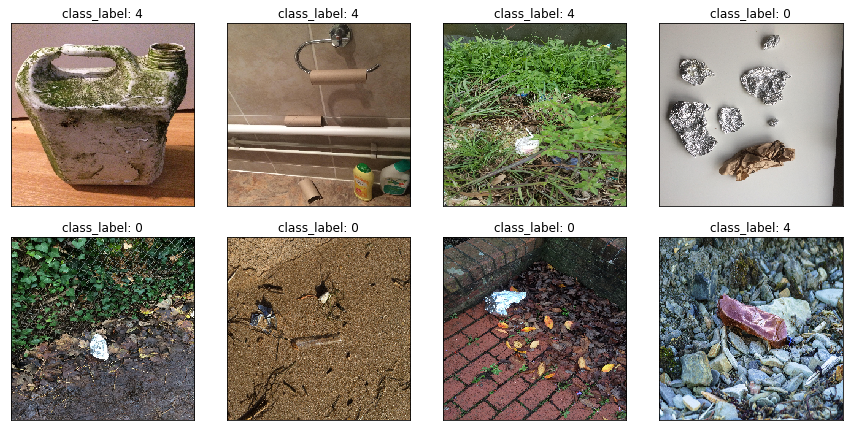

In [10]:
#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
  #x[i] = x[i][:,:,::-1] # converting BGR to RGB
    plt.imshow(x[i][:,:,::-1], interpolation='none')
    plt.title("class_label: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

## Actual generator

In [16]:
def preprocessing(img,label):
    img = cv2.resize(img,(300,300))
    img = img/255
    #print(label)
    label = np_utils.to_categorical(y = label, num_classes = 5)
    label = label
    return img,label

In [17]:
def data_generator(samples, batch_size=32,shuffle_data=True,resize=300):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        #samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(os.path.join(root_dir,img_name))
                #print(img.shape)
                # apply any kind of preprocessing
                img,label = preprocessing(img,label)
                #print(img.shape)
                # Add example to arrays
                X_train.append(img)
                y_train.append(label)
                

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            #print(X_train.shape)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [18]:
# this will create a generator object
train_datagen = data_generator(samples,batch_size=8)

x,y = next(train_datagen)
print ('x_shape: ', x.shape)
print ('labels shape: ', y.shape)
print ('labels: ', y)

x_shape:  (8, 300, 300, 3)
labels shape:  (8, 5)
labels:  [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [19]:
# Create generator
batch_size = 8
num_train_samples = len(train_sample)
num_test_samples = len(test_sample)
train_generator = data_generator(train_sample, batch_size=32)
validation_generator = data_generator(test_sample, batch_size=32)

## Actual Model

In [21]:
# making a custom vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
# mark some layers as not trainable
# model.get_layer('block1_conv1').trainable = False
# model.get_layer('block1_conv2').trainable = False
# model.get_layer('block2_conv1').trainable = False
# model.get_layer('block2_conv2').trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(5, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)      

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.fit_generator(
        train_generator,
        steps_per_epoch=num_train_samples // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=num_test_samples // batch_size)
model.save_weights('first_try.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
15/15 [==============================] - 129s 9s/step - loss: 8.4087 - accuracy: 0.5969 - val_loss: 1.1480 - val_accuracy: 0.9677
Epoch 2/10
15/15 [==============================] - 118s 8s/step - loss: 1.0588 - accuracy: 0.9336 - val_loss: 0.3572 - val_accuracy: 0.9355
Epoch 3/10
15/15 [==============================] - 117s 8s/step - loss: 0.1887 - accuracy: 0.9668 - val_loss: 0.0926 - val_accuracy: 0.9355
Epoch 4/10
15/15 [==============================] - 117s 8s/step - loss: 0.1667 - accuracy: 0.9712 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 120s 8s/step - loss: 0.1337 - accuracy: 0.9651 - val_loss: 0.0386 - val_accuracy: 0.9677
Epoch 6/10
15/15 [==============================] - 120s 8s/step - loss: 0.1126 - accuracy: 0.9535 - val_loss: 0.0739 - val_accuracy: 0.9677
Epoch 7/10
15/15 [==============================] - 119s 8s/step - loss: 0.118

## Checking on test data

In [117]:
root_dir+samples[1][0]

'C:\\Users\\Abhishek\\Desktop\\Mega drive\\DL projects\\Garbage classification\\data\\databatch_8/000071.jpg'

In [124]:
img_test =  cv2.imread(os.path.join(root_dir,samples[111][0]))
img_test = cv2.resize(img_test,(300,300))
img_test = img_test/255

(300, 300, 3)


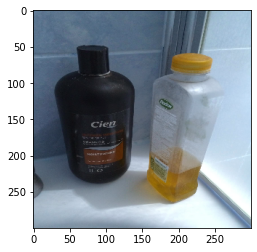

In [125]:
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(-1, 300, 300, 3)

In [126]:
pred_class = np.argmax(model.predict(img_test))

In [127]:
if (pred_class == 0):
    print('it is an image of : ', "Aluminium foil")
elif pred_class == 1:
    print('it is an image of : ', "Battery")
elif pred_class == 2:
    print('it is an image of : ', "Aluminium blister pack")
elif pred_class == 3:
    print('it is an image of : ', "Carded blister pack")
else:
    print('it is an image of : ', "Other plastic bottle")
    

it is an image of :  Other plastic bottle
